<a href="https://colab.research.google.com/github/SarojaPandiyan/Sentimental-Analysis/blob/main/NLP_SentimentalAnalysis_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/NLP-Internship/Dataset/ISEAR_dataset.csv')
data.columns = ['EMOTION','TEXT','drop']
data.drop('drop',axis =1)
data.head()

,EMOTION,TEXT,drop
0,fear,Every time I imagine that someone I love or I ...,NaN
1,anger,When I had been obviously unjustly treated and...,NaN
2,sadness,When I think about the short time that we live...,NaN
3,disgust,At a gathering I found myself involuntarily si...,NaN
4,shame,When I realized that I was directing the feeli...,NaN


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from textblob import TextBlob
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#converting to lowercase
data['TEXT']=data['TEXT'].apply(lambda a:" ".join(a.lower() for a in a.split()))

#removing stopwords
stop = stopwords.words('english')
data['TEXT']=data['TEXT'].apply(lambda a:" ".join(a for a in a.split() if a not in stop))

#having stemwords alone
st=SnowballStemmer('english')
data['TEXT']=data['TEXT'].apply(lambda a:" ".join(st.stem(a) for a in a.split()))
data['TEXT'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    everi time imagin someon love could contact se...
1            obvious unjust treat possibl elucid this.
2    think short time live relat period life think ...
3    gather found involuntarili sit next two peopl ...
4    realiz direct feel discont partner way tri put...
Name: TEXT, dtype: object

In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder
data['EMOTION'].value_counts()

le = LabelEncoder()
data['EMOTION']=le.fit_transform(data['EMOTION'])
data['EMOTION'].value_counts()


EMOTION
4    1091
5    1082
0    1079
2    1076
6    1071
1    1066
3    1050
Name: count, dtype: int64

In [ ]:
#splitting for training and testing
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest=train_test_split(data['TEXT'],data['EMOTION'],stratify=data['EMOTION'])


In [ ]:
#vectorisation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
xTrainCV = cv.fit_transform(xTrain)
xTestCV = cv.transform(xTest)

tv = TfidfVectorizer()
xTrainTV = tv.fit_transform(xTrain)
xTestTV = tv.transform(xTest)



In [ ]:
#model building
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

def build(model_selection,independent_variable_train,target,independent_variable_test):
  model=model_selection
  model.fit(independent_variable_train,target)
  pdt = model.predict(independent_variable_test)
  accuracy = accuracy_score(yTest,pdt)
  print("Accuracy:\n",accuracy)
  precision = precision_score(yTest,pdt,average='weighted')
  print("Precision:\n",precision)
  cm = confusion_matrix(yTest,pdt)
  print("Confusion Matrix:\n",cm)

  return accuracy,precision




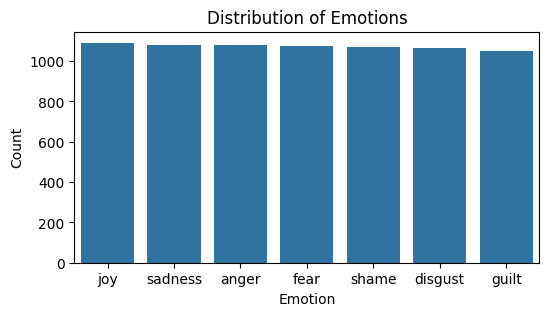

In [ ]:
#visualising data

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'SENTIMENT' column
data['EMOTION_LABEL']=le.inverse_transform(data['EMOTION'])
sentiment_counts = data['EMOTION_LABEL'].value_counts()
plt.figure(figsize=(6, 3))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.show()

In [ ]:
#naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
accuracy1,precision1= build(model,xTrainCV,yTrain,xTestCV)
accuracy2,precision2= build(model,xTrainTV,yTrain,xTestTV)


Accuracy:
 0.55401809473124
Precision:
 0.5574352372364039
Confusion Matrix:
 [[113  21  19  52  19  18  28]
 [ 35 141  21  13  13  18  25]
 [ 18  10 187  12  15  14  13]
 [ 42   9  24 123   6  24  34]
 [ 14   4   6  13 186  41   9]
 [ 25   5  18  21  21 165  16]
 [ 32  19  20  44  16  11 126]]
Accuracy:
 0.5444385311335816
Precision:
 0.5457926811269165
Confusion Matrix:
 [[107  23  22  49  21  20  28]
 [ 36 133  20  15  20  17  25]
 [ 21  10 183  11  14  14  16]
 [ 45   6  23 116  10  27  35]
 [ 10   3   9   7 194  37  13]
 [ 20   6  14  17  24 171  19]
 [ 34  17  18  45  20  15 119]]


In [ ]:
#Support vector machine
from sklearn.svm import SVC

model = SVC()
accuracy4,precision4= build(model,xTrainTV,yTrain,xTestTV)


Accuracy:
 0.5747738158594997
Precision:
 0.5823520468437793
Confusion Matrix:
 [[147  28  16  28  15  15  21]
 [ 39 154  14  13  14   7  25]
 [ 22  17 187  11  10   6  16]
 [ 64  12  13 112   9  21  31]
 [ 14  13  10  12 201  11  12]
 [ 26  12  15  23  24 149  22]
 [ 40  30  10  34  17   7 130]]


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
accuracy3,precision3=build(model,xTrainCV,yTrain,xTestCV)
accuracy4,precision4= build(model,xTrainTV,yTrain,xTestTV)


KeyboardInterrupt: 

In [ ]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
accuracy3,precision3=build(model,xTrainCV,yTrain,xTestCV)
accuracy4,precision4= build(model,xTrainTV,yTrain,xTestTV)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:
 0.572645023948909
Precision:
 0.5731583646467873
Confusion Matrix:
 [[129  32  13  36  13  23  24]
 [ 35 139  17  14  19   8  34]
 [ 13  15 173  22  12  22  12]
 [ 41  13  11 127  15  18  37]
 [ 11   4   8  14 205  17  14]
 [ 12  12  11  16  29 169  22]
 [ 30  18  19  34  26   7 134]]
Accuracy:
 0.5955295369877595
Precision:
 0.5967173753904157
Confusion Matrix:
 [[148  30  13  31  15  16  17]
 [ 33 151  16  11  17   5  33]
 [ 13  15 178  17  14  20  12]
 [ 41  15  13 132  13  14  34]
 [ 10   4  10  16 202  15  16]
 [  9  13  12  18  28 172  19]
 [ 35  21  20  33  18   5 136]]


In [ ]:
# Preprocessing function
def preprocess(text):
    # Converting to lowercase
    text = " ".join(text.lower() for text in text.split())

    # Removing stopwords
    stop = stopwords.words('english')
    text = " ".join(word for word in text.split() if word not in stop)

    # Stemming
    st = SnowballStemmer('english')
    text = " ".join(st.stem(word) for word in text.split())

    # Removing special characters
    text = re.sub('[^\w\s]', '', text)

    # Removing numbers
    text = re.sub('\d', '', text)

    return text


In [ ]:
#prediction
def predict_emotion(text):
    # Preprocess the text
    preprocessed_text = preprocess(text)

    # Transform the text using the trained TfidfVectorizer
    text_vector = tv.transform([preprocessed_text])

    # Predict the sentiment
    sentiment = model.predict(text_vector)

    # Decode the sentiment label
    sentiment_label = le.inverse_transform(sentiment)

    return sentiment_label[0]

In [ ]:
input = "I am sorry"
predicted_sentiment = predict_emotion(input)
print(f"The predicted sentiment is: {predicted_sentiment}")

The predicted sentiment is: disgust


In [ ]:
import pickle

pickle.dump(model,open('/content/drive/MyDrive/NLP-Internship/Emotion_model.pkl','wb'))

In [ ]:
emotion_le = '/content/drive/MyDrive/NLP-Internship/emotion_label_encoder.pkl'
with open(emotion_le, 'wb') as file:
    pickle.dump(le, file)

with open('/content/drive/MyDrive/NLP-Internship/emotion_tfidf.pkl', 'wb') as f:
    pickle.dump(tv, f)